<a href="https://colab.research.google.com/github/youngsoomoon/ML-DL_Basic/blob/main/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법(Stochastic gradient Descent)

선형회귀나 로지스틱회귀와 같은 머신러닝 알고리즘은 아니다.<br>
머신러닝 알고리즘을 훈련 / 최적화하는 방법이다.
점진적 / 온라인 학습

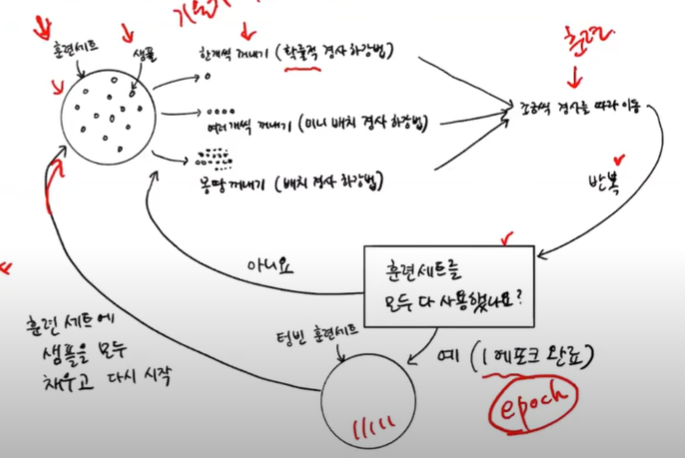

## 손실함수
머신러닝 알고리즘이 나쁜 정도를 측정하는 함수<br>
분류에서는 정확도로 성능을 측정하지만 모델을 최적화 할때는 다른 손실함수를 쓴다.


## 로지스틱 손실 함수

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [6]:
# 경사하강법을 사용할 때에는 반드시 특성의 스케일을 조정해줘야함
from sklearn.preprocessing import StandardScaler

# 평균과 표준편차를 구함
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
from sklearn.linear_model import SGDClassifier

In [14]:
# loss의 log는 로지스틱함수를 지정하는것
# 점진적인 학습을위해 max_iter는 10으로 지정
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [15]:
# partial_fit메서드는 기존에 학습시킨것을 유지하면서 또 다시 학습하는것
# 그냥 fit으로 학습을시키면 기존 학습시켰던 정보 사라짐
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


## 에포크와 과대/과소 적합

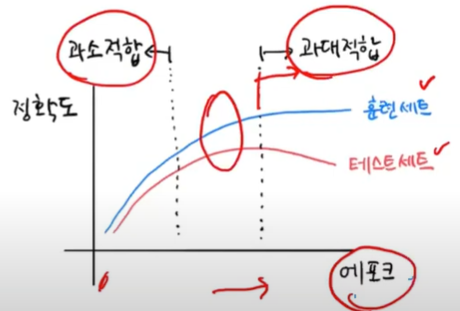

In [16]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [17]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

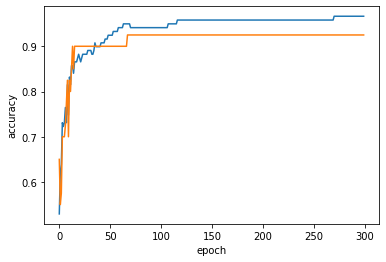

In [18]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 조기 종료

In [20]:
# SGDClassifier는 머신러닝 알고리즘이 아닌 최적화 방법
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
